In [28]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

In [29]:
results = pd.read_csv(
    './../../data_source/results/original_images/all_features_original_images.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,XGBoost__learning_rate,XGBoost__max_depth,XGBoost__min_data_in_leaf,XGBoost__min_split_loss,XGBoost__n_estimators,XGBoost__reg_alpha,XGBoost__reg_lambda,test_score,...,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreeEstimator__criterion,ExtraTreeEstimator__max_depth,ExtraTreeEstimator__max_features,ExtraTreeEstimator__min_samples_leaf
0,44,DummySelection_XGBoost,5.851029,33.0,7.0,7.212265e-05,146.0,2.332634,6.710807,0.628755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,DummySelection_XGBoost,2.737807,210.0,5.0,1.716679e-05,113.0,4.878576,3.725477,0.655037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,DummySelection_XGBoost,0.010000,100.0,5.0,1.000000e-09,100.0,0.001000,0.001000,0.670055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DummySelection_XGBoost,0.010000,100.0,5.0,1.000000e-09,100.0,0.001000,0.001000,0.628571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,DummySelection_XGBoost,0.010000,100.0,5.0,1.000000e-09,100.0,0.001000,0.001000,0.628571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
results.shape

(4000, 61)

In [1]:
#model_name = 'FisherScoreSelection_DTreeEstimator'
model_name = 'ChiSquareSelection_DTreeEstimator'
fisher = results[results['experiment_id'] == model_name]

NameError: name 'results' is not defined

# Best Dummy Config

In [8]:
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves 
# contain less than min_samples_split samples.
dummy_max_depth = np.copy(dummy['DTreeEstimator__max_depth'].values)
dummy_max_depth[np.where(np.isnan(dummy_max_depth))] = -1
Counter(dummy_max_depth)

Counter({5.0: 13, -1.0: 8, 20.0: 19, 10.0: 10})

In [9]:
Counter((dummy['DTreeEstimator__criterion']))

Counter({'gini': 20, 'entropy': 30})

In [10]:
# NOTE: Difficult to determine optimal config form a range of numerical values.
# Use validation curve to determine best value with other params fixed.
np.mean(dummy['DTreeEstimator__min_samples_leaf'])

0.1919008878819516

# Best Fisher Config

In [23]:
#np.mean(fisher['FisherScoreSelection__num_features'])

fisher['FisherScoreSelection__num_features'].values[np.where(fisher['test_score'] == fisher['test_score'].max())]

array([nan])

In [24]:
#fisher_max_depth = np.copy(fisher['DTreeEstimator__max_depth'].values)
#fisher_max_depth[np.where(np.isnan(fisher_max_depth))] = -1
#Counter(fisher_max_depth)

fisher['DTreeEstimator__max_depth'].values[np.where(fisher['test_score'] == fisher['test_score'].max())]

array([10.])

In [25]:
#Counter((fisher['DTreeEstimator__criterion']))
fisher['DTreeEstimator__criterion'].values[np.where(fisher['test_score'] == fisher['test_score'].max())]

array(['gini'], dtype=object)

In [26]:
#np.mean(fisher['DTreeEstimator__min_samples_leaf']), np.std(fisher['DTreeEstimator__min_samples_leaf'])
fisher['DTreeEstimator__min_samples_leaf'].values[np.where(fisher['test_score'] == fisher['test_score'].max())]

array([0.15905747])

# Experimental Results Fisher DTree and Dummy DTree

"\nplt.savefig(\n    './../../../figures/fisher_dtree_validation_curve.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=100,\n)\n"

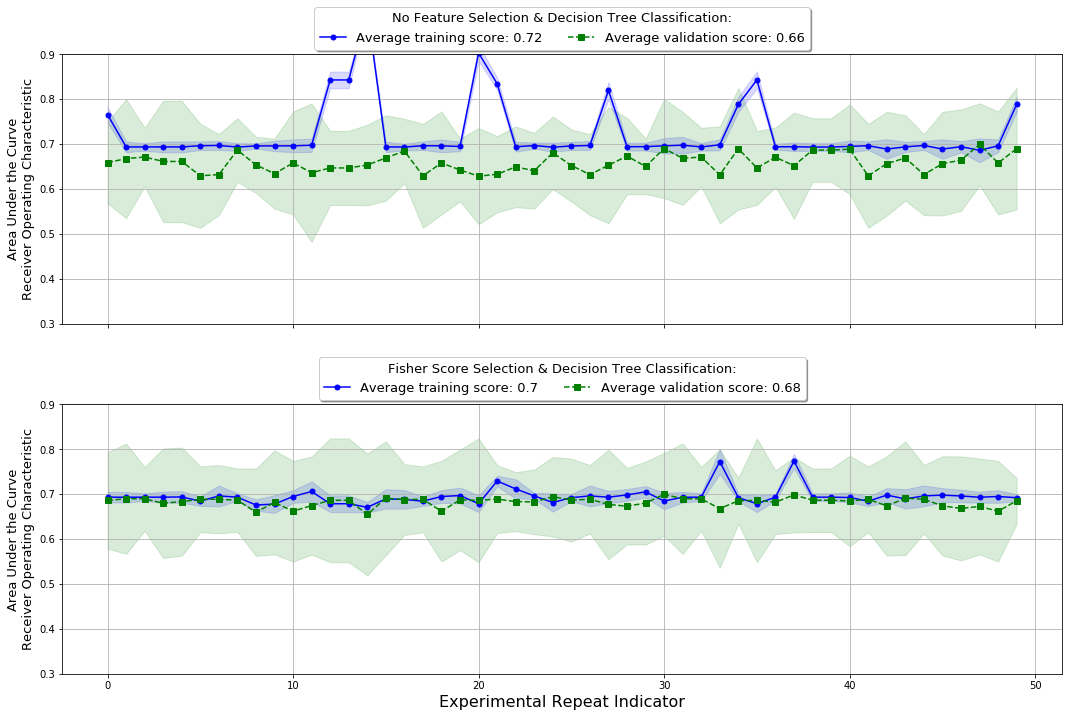

In [27]:
# No feature selection, only decision tree classifier, seems to be the most stable option.

dummy_test = dummy['test_score']
dummy_train = dummy['train_score']
dummy_test_std = np.sqrt(dummy['test_score_variance'])
dummy_train_std = np.sqrt(dummy['train_score_variance'])

fisher_test = fisher['test_score']
fisher_train = fisher['train_score']
fisher_test_std = np.sqrt(fisher['test_score_variance'])
fisher_train_std = np.sqrt(fisher['train_score_variance'])

# Repeated experiments.
x_coords = np.arange(np.size(dummy_train_std))

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
axes[0].plot(
    x_coords, 
    dummy_train, 
    color='blue', marker='o', markersize=5, 
    label=f"Average training score: {np.round(np.mean(dummy_train), 2)}"
)
axes[0].plot(
    x_coords, 
    dummy_test, 
    color='green', linestyle='--', marker='s', 
    label=f"Average validation score: {np.round(np.mean(dummy_test), 2)}"
)
axes[0].fill_between(
    x_coords, 
    dummy_train - dummy_train_std, 
    dummy_train + dummy_train_std, 
    alpha=0.15, color='blue'
)
axes[0].fill_between(
    x_coords, 
    dummy_test - dummy_test_std, 
    dummy_test + dummy_test_std, 
    alpha=0.15, color='green'
)
axes[0].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),
    #title=f'Best test score: {np.round(np.max(dummy_test), 2)}',
    title='No Feature Selection & Decision Tree Classification:',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[0].grid()
axes[0].set_ylim([0.3, 0.9])
axes[0].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)

# Plot mean accuracy scores for training and test sets
axes[1].plot(
    x_coords,  
    fisher_train, 
    color='blue', marker='o', markersize=5, 
    label=f"Average training score: {np.round(np.mean(fisher_train), 2)}"
)
axes[1].plot(
    x_coords,  
    fisher_test, 
    color='green', linestyle='--', marker='s', 
    label=f"Average validation score: {np.round(np.mean(fisher_test), 2)}"
)
# Plot accurancy bands for training and test sets
axes[1].fill_between(
    x_coords, 
    fisher_train - fisher_train_std, 
    fisher_train + fisher_train_std, 
    alpha=0.15, color='blue'
)
axes[1].fill_between(
    x_coords, 
    fisher_test - fisher_test_std, 
    fisher_test + fisher_test_std, 
    alpha=0.15, color='green'
)
axes[1].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)
axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),
    #title=f'Best test score: {np.round(np.max(fisher_test), 2)}',
    title='Fisher Score Selection & Decision Tree Classification:',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[1].grid()
axes[1].set_ylim([0.3, 0.9])
axes[1].set_xlabel('Experimental Repeat Indicator', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
"""
plt.savefig(
    './../../../figures/fisher_dtree_validation_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)
"""                   

# Number Fisher Selected Features per Experiment

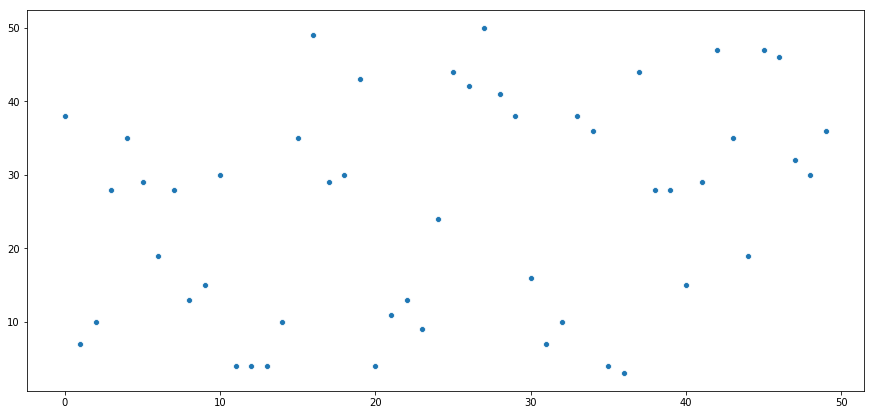

In [16]:
# The number of features selected by Fisher score in each experimental run.
num_feats_selected = np.squeeze(fisher.filter(regex='Fisher').values)

plt.figure(figsize=(15, 7))
sns.scatterplot(
    np.arange(np.size(num_feats_selected)), 
    num_feats_selected,
)

In [17]:
np.mean(num_feats_selected)

25.72

# Validation Curves

In [18]:
param_range = np.linspace(1e-8, 0.4-1e-10, 50)

In [19]:
dummy_valid_train = np.load('./../results/validation_curves/avg_dummy_dtree_min_samples_split_valid_train.npy')
dummy_valid_test = np.load('./../results/validation_curves/avg_dummy_dtree_min_samples_split_valid_test.npy')

dummy_valid_train_mean = np.mean(dummy_valid_train, axis=1)
dummy_valid_train_std = np.std(dummy_valid_train, axis=1)

dummy_valid_test_mean = np.mean(dummy_valid_test, axis=1)
dummy_valid_test_std = np.std(dummy_valid_test, axis=1)

IndexError: tuple index out of range

In [31]:
np.mean(param_range[np.where(dummy_valid_test == np.max(dummy_valid_test))])

0.18932496597307696

In [20]:
fisher_valid_train = np.load('./../results/validation_curves/avg_fisher_dtree_min_samples_split_valid_train.npy')
fisher_valid_test = np.load('./../results/validation_curves/avg_fisher_dtree_min_samples_split_valid_test.npy')

fisher_valid_train_mean = np.mean(fisher_valid_train, axis=1)
fisher_valid_train_std = np.std(fisher_valid_train, axis=1)

fisher_valid_test_mean = np.mean(fisher_valid_test, axis=1)
fisher_valid_test_std = np.std(fisher_valid_test, axis=1)

In [26]:
param_range[np.where(fisher_valid_test == np.max(fisher_valid_test))]

array([0.2367347])

"\nplt.savefig(\n    './../../../figures/fisher_dtree_validation_curve.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=100,\n)"

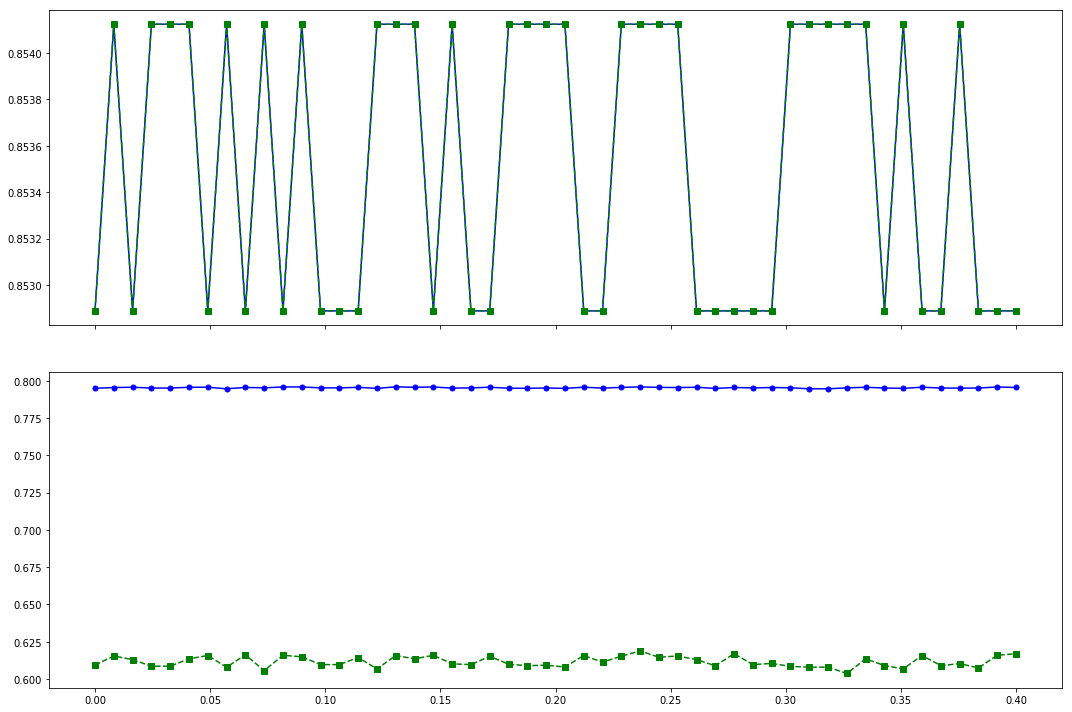

In [23]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))

axes[0].plot(
    param_range, 
    dummy_valid_train,
    #dummy_valid_train_mean, 
    color='blue', marker='o', markersize=5, 
    label="Training score"
)
axes[0].plot(
    param_range, 
    dummy_valid_test,
    #dummy_valid_test_mean, 
    color='green', linestyle='--', marker='s', 
    label="Validation score"
)
"""
axes[0].fill_between(
    param_range, 
    dummy_valid_train_mean - dummy_valid_train_std , 
    dummy_valid_train_mean + dummy_valid_train_std , 
    alpha=0.15, color='blue'
)
axes[0].fill_between(
    param_range, 
    dummy_valid_test_mean - dummy_valid_test_std, 
    dummy_valid_test_mean + dummy_valid_test_std, 
    alpha=0.15, color='green'
)
axes[0].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
axes[0].legend(
    loc='upper center',
    #bbox_to_anchor=(0.5, 1.22),
    title='No Feature Selection & Decision Tree Classifier',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[0].grid()
axes[0].set_ylim([0.4, 0.9])
"""

axes[1].plot(
    param_range, 
    fisher_valid_train,
    #fisher_valid_train_mean, 
    color='blue', marker='o', markersize=5, 
    label="Training score"
)
axes[1].plot(
    param_range, 
    fisher_valid_test,
    #fisher_valid_test_mean, 
    color='green', linestyle='--', marker='s', 
    label="Validation score"
)
"""
axes[1].fill_between(
    param_range, 
    fisher_valid_train_mean - fisher_valid_test_std, 
    fisher_valid_train_mean + fisher_valid_test_std, 
    alpha=0.15, color='blue'
)
axes[1].fill_between(
    param_range, 
    fisher_valid_test_mean - fisher_valid_test_std, 
    fisher_valid_test_mean + fisher_valid_test_std, 
    alpha=0.15, color='green'
)
axes[1].set_xlabel('Min Samples Leaf Ratio', fontsize=16)
axes[1].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
axes[1].legend(
    loc='upper center',
    #bbox_to_anchor=(0.5, 1.22),
    title='Fisher Score Selection & Decision Tree Classifier',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[1].grid()
axes[1].set_ylim([0.4, 0.9])
"""

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

"""
plt.savefig(
    './../../../figures/fisher_dtree_validation_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)"""

In [25]:
best_dummy_score = np.max(dummy_valid_test_mean)
best_fisher_score = np.max(fisher_valid_test_mean)

best_dummy_score, best_fisher_score

(0.6882783882783883, 0.6882783882783883)

In [26]:
best_dummy_param = param_range[np.where(dummy_valid_test_mean == best_dummy_score)]
best_fisher_param = param_range[np.where(fisher_valid_test_mean == best_fisher_score)]

best_dummy_param, best_fisher_param

(array([0.37755127]), array([0.37755127]))

# Learning Curves

In [27]:
dummy_train_sizes = np.load('./../results/learning_curves/dummy_learn_train_sizes.npy')
fisher_train_sizes = np.load('./../results/learning_curves/fisher_learn_train_sizes.npy')

In [28]:
dummy_learn_train = np.load('./../results/learning_curves/dummy_learn_train_scores.npy')
dummy_learn_test = np.load('./../results/learning_curves/dummy_learn_test_scores.npy')

dummy_learn_train_mean = np.mean(dummy_learn_train, axis=1)
dummy_learn_train_std = np.std(dummy_learn_train, axis=1)

dummy_learn_test_mean = np.mean(dummy_learn_test, axis=1)
dummy_learn_test_std = np.std(dummy_learn_test, axis=1)

In [29]:
fisher_learn_train = np.load('./../results/learning_curves/fisher_learn_train_scores.npy')
fisher_learn_test = np.load('./../results/learning_curves/fisher_learn_test_scores.npy')

fisher_learn_train_mean = np.mean(fisher_learn_train, axis=1)
fisher_learn_train_std = np.std(fisher_learn_train, axis=1)

fisher_learn_test_mean = np.mean(fisher_learn_test, axis=1)
fisher_learn_test_std = np.std(fisher_learn_test, axis=1)

"\nplt.savefig(\n    './../../../figures/fisher_dtree_validation_curve.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=100,\n)"

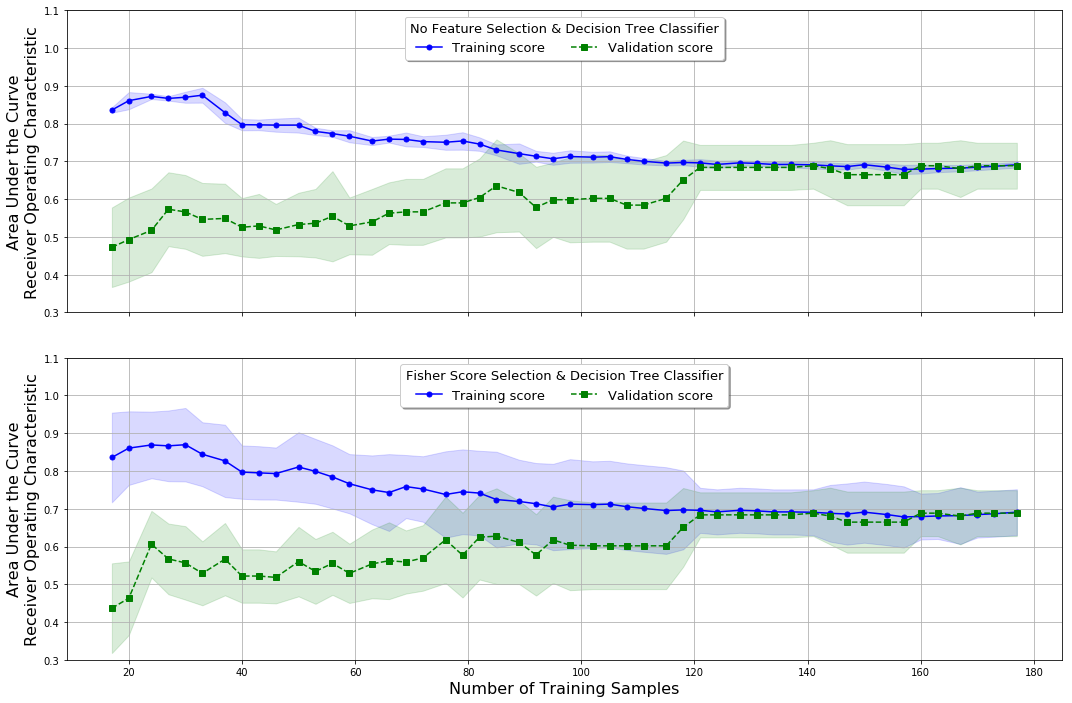

In [30]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))

axes[0].plot(
    dummy_train_sizes, 
    dummy_learn_train_mean, 
    color='blue', marker='o', markersize=5, 
    label="Training score"
)
axes[0].plot(
    dummy_train_sizes, 
    dummy_learn_test_mean, 
    color='green', linestyle='--', marker='s', 
    label="Validation score"
)
axes[0].fill_between(
    dummy_train_sizes, 
    dummy_learn_train_mean - dummy_learn_train_std , 
    dummy_learn_train_mean + dummy_learn_train_std , 
    alpha=0.15, color='blue'
)
axes[0].fill_between(
    dummy_train_sizes, 
    dummy_learn_test_mean - dummy_learn_test_std, 
    dummy_learn_test_mean + dummy_learn_test_std, 
    alpha=0.15, color='green'
)
axes[0].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
axes[0].legend(
    loc='upper center',
    #bbox_to_anchor=(0.5, 1.22),
    title='No Feature Selection & Decision Tree Classifier',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[0].grid()
axes[0].set_ylim([0.3, 1.1])


axes[1].plot(
    fisher_train_sizes, 
    fisher_learn_train_mean, 
    color='blue', marker='o', markersize=5, 
    label="Training score"
)
axes[1].plot(
    fisher_train_sizes, 
    fisher_learn_test_mean, 
    color='green', linestyle='--', marker='s', 
    label="Validation score"
)
axes[1].fill_between(
    fisher_train_sizes, 
    fisher_learn_train_mean - fisher_learn_test_std, 
    fisher_learn_train_mean + fisher_learn_test_std, 
    alpha=0.15, color='blue'
)
axes[1].fill_between(
    fisher_train_sizes, 
    fisher_learn_test_mean - fisher_learn_test_std, 
    fisher_learn_test_mean + fisher_learn_test_std, 
    alpha=0.15, color='green'
)
axes[1].set_xlabel('Number of Training Samples', fontsize=16)
axes[1].set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
axes[1].legend(
    loc='upper center',
    #bbox_to_anchor=(0.5, 1.22),
    title='Fisher Score Selection & Decision Tree Classifier',
    ncol=2,
    fontsize=13,
    title_fontsize=13,
    fancybox=True,
    shadow=True
)
axes[1].grid()
axes[1].set_ylim([0.3, 1.1])


plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

"""
plt.savefig(
    './../../../figures/fisher_dtree_validation_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)"""

# ROC AUC

In [45]:
# TODO: Make script. Use ROC curves when assessing importance of feature categories rather than running the 
# complete experiments all over!!!

import sys
sys.path.append('./../experiments/')

from scipy import interp

from algorithms import classification
from algorithms import feature_selection

from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

ModuleNotFoundError: No module named 'xgboost'

In [39]:
X = pd.read_csv(
    './../../data_source/to_analysis/original_images/all_features_original_images.csv',
    index_col=0
)
y = pd.read_csv(
    './../../data_source/to_analysis/original_images/dfs_original_images.csv',
    index_col=0
)
X, y = X.values, np.squeeze(y.values)

In [40]:
n_samples, n_features = np.shape(X)

In [41]:
# Run classifier with cross-validation and plot ROC curves
folds = StratifiedKFold(n_splits=10, random_state=0)

In [ ]:
classifier = Pipeline(
    [
        StandardScaler(),
        
    ]
)

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure()

i = 0
for train_idx, test_idx in folds.split(X, y):
    probas_ = classifier.fit(X[train_idx], y[train_idx]).predict_proba(X[test_idx])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test_idx], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")